In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("large_ecommerce_sales.csv", header=0, names=[
    "Order ID", "Customer Name", "Country", "Order Date", "Product",
    "Category", "Quantity", "Price", "Total Price", "Payment Method"
])


In [3]:
df

,Order ID,Customer Name,Country,Order Date,Product,Category,Quantity,Price,Total Price,Payment Method
0,10000,Michelle Murphy,Japan,2024-12-07,Coffee Mug,Kitchen,3,466.78,1400.34,PayPal
1,10001,Sarah Williams,Russia,2025-01-21,Pen Set,Stationery,3,452.55,1357.65,Credit Card
2,10002,Kara Lucas,UK,2024-09-02,Leather Wallet,Accessories,2,239.79,479.58,PayPal
3,10003,Amanda Whitaker,Germany,2025-01-17,Running Shoes,Apparel,2,194.49,388.98,Debit Card
4,10004,Natasha Schultz,Brazil,2024-08-22,Notebook,Stationery,4,349.09,1396.36,PayPal
...,...,...,...,...,...,...,...,...,...,...
995,10995,William Brown,Australia,2025-02-10,Blender,Kitchen,4,47.21,188.84,Debit Card
996,10996,Richard Solis,India,2025-03-16,Bluetooth Headphones,Electronics,5,256.87,1284.35,PayPal
997,10997,Heather White,Brazil,2024-12-18,Coffee Mug,Kitchen,3,64.94,194.82,Debit Card
998,10998,Cynthia Melendez,India,2024-11-18,Sunglasses,Accessories,1,316.14,316.14,PayPal


In [4]:
df.tail()

,Order ID,Customer Name,Country,Order Date,Product,Category,Quantity,Price,Total Price,Payment Method
995,10995,William Brown,Australia,2025-02-10,Blender,Kitchen,4,47.21,188.84,Debit Card
996,10996,Richard Solis,India,2025-03-16,Bluetooth Headphones,Electronics,5,256.87,1284.35,PayPal
997,10997,Heather White,Brazil,2024-12-18,Coffee Mug,Kitchen,3,64.94,194.82,Debit Card
998,10998,Cynthia Melendez,India,2024-11-18,Sunglasses,Accessories,1,316.14,316.14,PayPal
999,10999,John Turner,USA,2025-05-26,Wireless Mouse,Electronics,3,494.18,1482.54,PayPal


In [5]:
df.head()

,Order ID,Customer Name,Country,Order Date,Product,Category,Quantity,Price,Total Price,Payment Method
0,10000,Michelle Murphy,Japan,2024-12-07,Coffee Mug,Kitchen,3,466.78,1400.34,PayPal
1,10001,Sarah Williams,Russia,2025-01-21,Pen Set,Stationery,3,452.55,1357.65,Credit Card
2,10002,Kara Lucas,UK,2024-09-02,Leather Wallet,Accessories,2,239.79,479.58,PayPal
3,10003,Amanda Whitaker,Germany,2025-01-17,Running Shoes,Apparel,2,194.49,388.98,Debit Card
4,10004,Natasha Schultz,Brazil,2024-08-22,Notebook,Stationery,4,349.09,1396.36,PayPal


In [6]:
df.count()

Order ID          1000
Customer Name     1000
Country           1000
Order Date        1000
Product           1000
Category          1000
Quantity          1000
Price             1000
Total Price       1000
Payment Method    1000
dtype: int64

In [7]:
df.groupby("Category").sum(numeric_only=True)


,Order ID,Quantity,Price,Total Price
Category,,,,
Accessories,2216868,642,50328.35,155322.77
Apparel,2083264,614,49249.48,150320.23
Electronics,2182612,580,52453.52,143905.93
Kitchen,2043036,557,49782.06,143471.29
Stationery,1973720,583,48568.36,150754.01


In [8]:
df.shape

(1000, 10)

In [13]:
df["Order Date"]


0      2024-12-07
1      2025-01-21
2      2024-09-02
3      2025-01-17
4      2024-08-22
          ...    
995    2025-02-10
996    2025-03-16
997    2024-12-18
998    2024-11-18
999    2025-05-26
Name: Order Date, Length: 1000, dtype: object

In [15]:
df.rename(columns={"Order Date": "DATE"}, inplace=True)

In [16]:
type(df.DATE[0])

str

In [17]:
df.DATE[1]

'2025-01-21'

In [18]:
df.DATE=pd.to_datetime(df.DATE)

In [19]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df.head()

,Order ID,Customer Name,Country,DATE,Product,Category,Quantity,Price,Total Price,Payment Method
0,10000,Michelle Murphy,Japan,2024-12-07,Coffee Mug,Kitchen,3,466.78,1400.34,PayPal
1,10001,Sarah Williams,Russia,2025-01-21,Pen Set,Stationery,3,452.55,1357.65,Credit Card
2,10002,Kara Lucas,UK,2024-09-02,Leather Wallet,Accessories,2,239.79,479.58,PayPal
3,10003,Amanda Whitaker,Germany,2025-01-17,Running Shoes,Apparel,2,194.49,388.98,Debit Card
4,10004,Natasha Schultz,Brazil,2024-08-22,Notebook,Stationery,4,349.09,1396.36,PayPal


In [23]:
reshaped_df = df.pivot_table(index='DATE', columns='Category', values='Total Price', aggfunc='sum')

In [24]:
reshaped_df

Category,Accessories,Apparel,Electronics,Kitchen,Stationery
DATE,,,,,
2024-06-02,738.58,1523.67,NaN,NaN,NaN
2024-06-03,1088.22,NaN,NaN,NaN,1287.14
2024-06-04,NaN,NaN,NaN,NaN,231.96
2024-06-05,NaN,1549.65,215.94,2544.40,NaN
2024-06-06,NaN,NaN,NaN,NaN,674.45
...,...,...,...,...,...
2025-05-29,NaN,NaN,NaN,1216.65,2071.75
2025-05-30,5.65,635.55,NaN,NaN,NaN
2025-05-31,NaN,948.90,NaN,6.50,623.84


In [25]:
reshaped_df.head()

Category,Accessories,Apparel,Electronics,Kitchen,Stationery
DATE,,,,,
2024-06-02,738.58,1523.67,NaN,NaN,NaN
2024-06-03,1088.22,NaN,NaN,NaN,1287.14
2024-06-04,NaN,NaN,NaN,NaN,231.96
2024-06-05,NaN,1549.65,215.94,2544.4,NaN
2024-06-06,NaN,NaN,NaN,NaN,674.45


In [26]:
reshaped_df.tail()

Category,Accessories,Apparel,Electronics,Kitchen,Stationery
DATE,,,,,
2025-05-29,NaN,NaN,NaN,1216.65,2071.75
2025-05-30,5.65,635.55,NaN,NaN,NaN
2025-05-31,NaN,948.90,NaN,6.50,623.84
2025-06-01,111.02,352.22,1611.68,NaN,1927.59
2025-06-02,NaN,NaN,161.50,563.78,2371.70


In [27]:
reshaped_df.shape

(340, 5)

In [28]:
reshaped_df.count()

Category
Accessories    161
Apparel        151
Electronics    163
Kitchen        158
Stationery     145
dtype: int64

In [29]:
reshaped_df.fillna(0,inplace=True)

In [30]:
reshaped_df.head()

Category,Accessories,Apparel,Electronics,Kitchen,Stationery
DATE,,,,,
2024-06-02,738.58,1523.67,0.00,0.0,0.00
2024-06-03,1088.22,0.00,0.00,0.0,1287.14
2024-06-04,0.00,0.00,0.00,0.0,231.96
2024-06-05,0.00,1549.65,215.94,2544.4,0.00
2024-06-06,0.00,0.00,0.00,0.0,674.45


In [31]:
reshaped_df.isna().sum()

Category
Accessories    0
Apparel        0
Electronics    0
Kitchen        0
Stationery     0
dtype: int64

In [32]:
import matplotlib.pyplot as plt

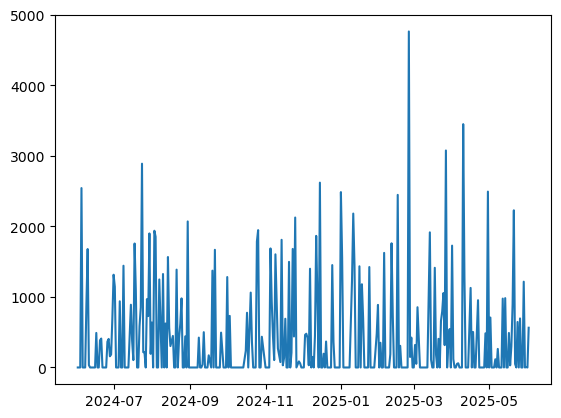

In [33]:
plt.plot(reshaped_df.index,reshaped_df["Kitchen"])

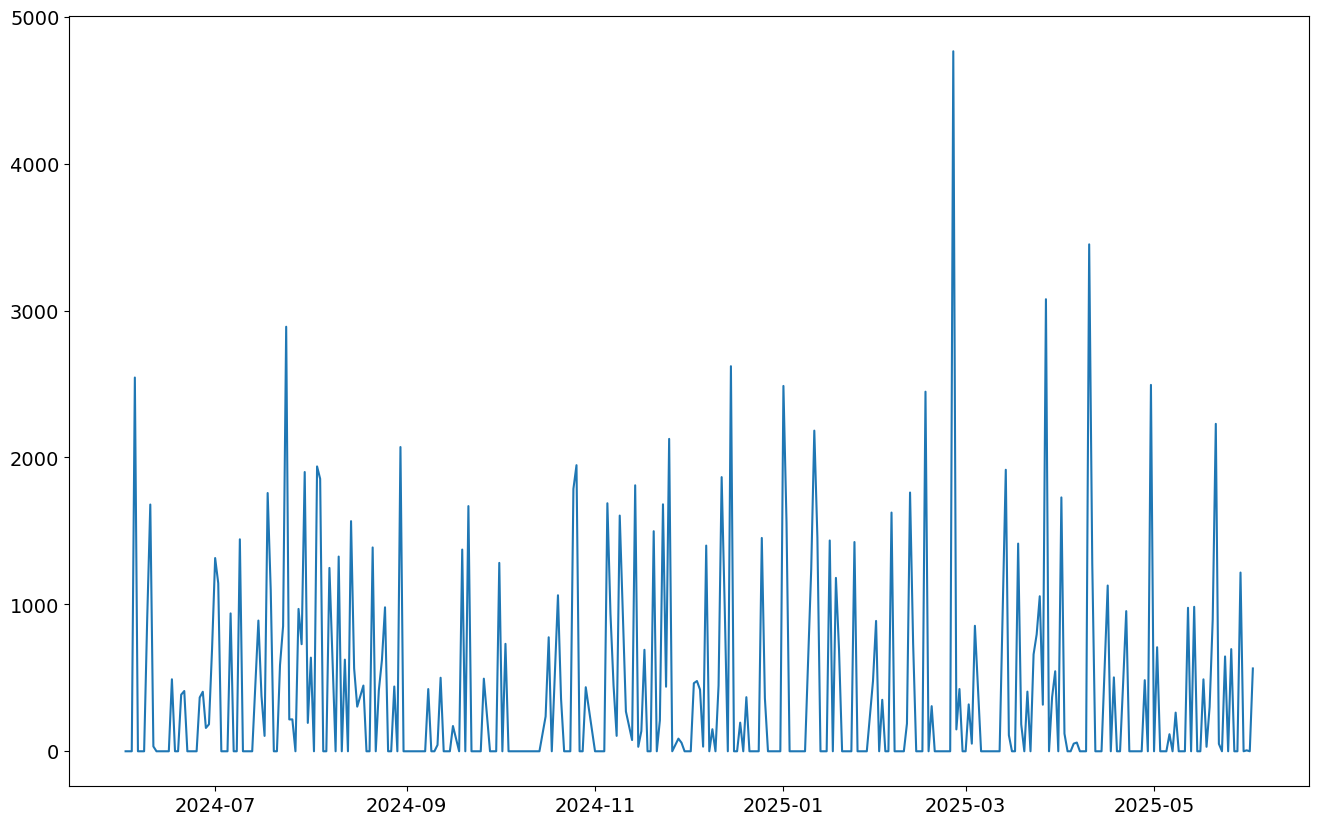

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["Kitchen"])

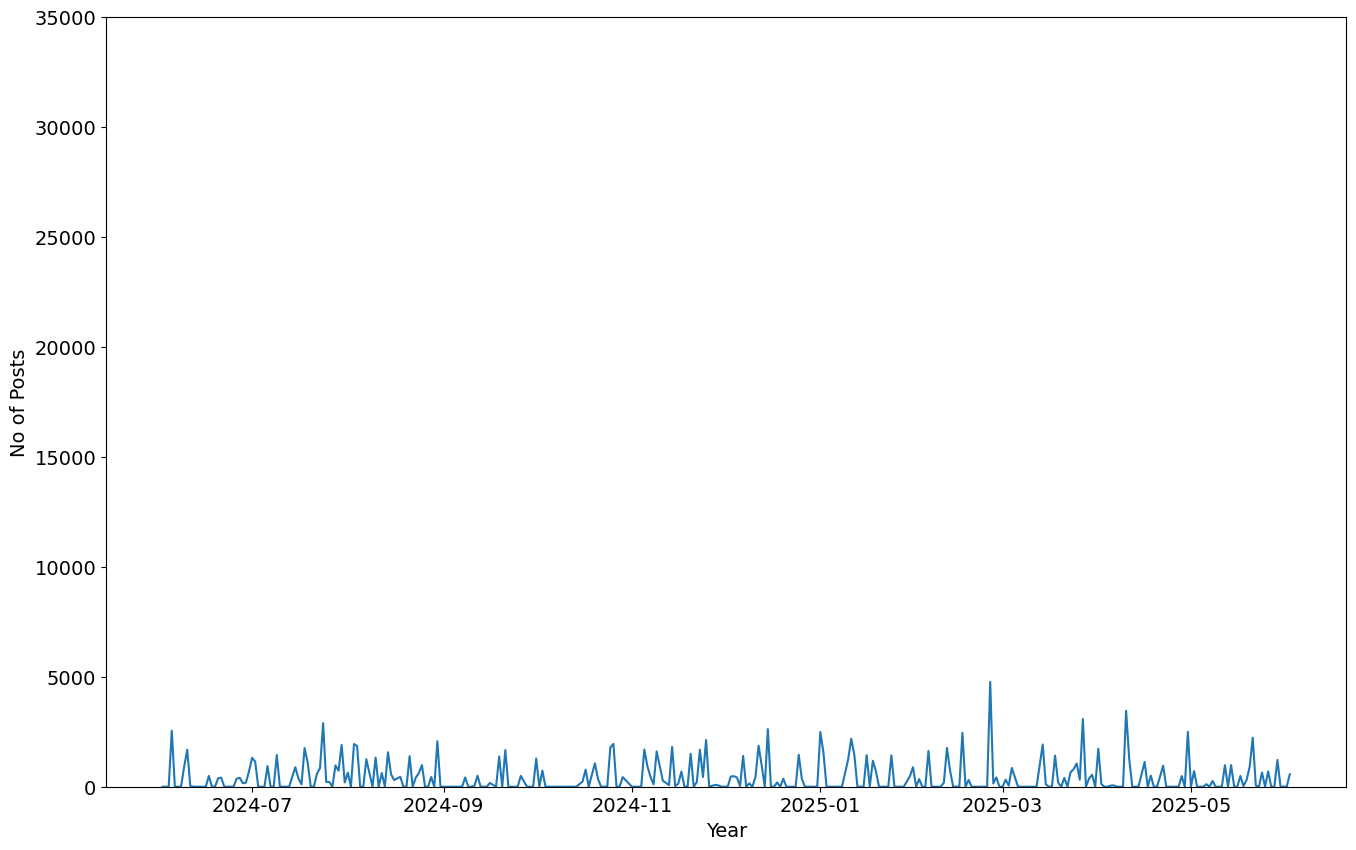

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Posts",fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df["Kitchen"])

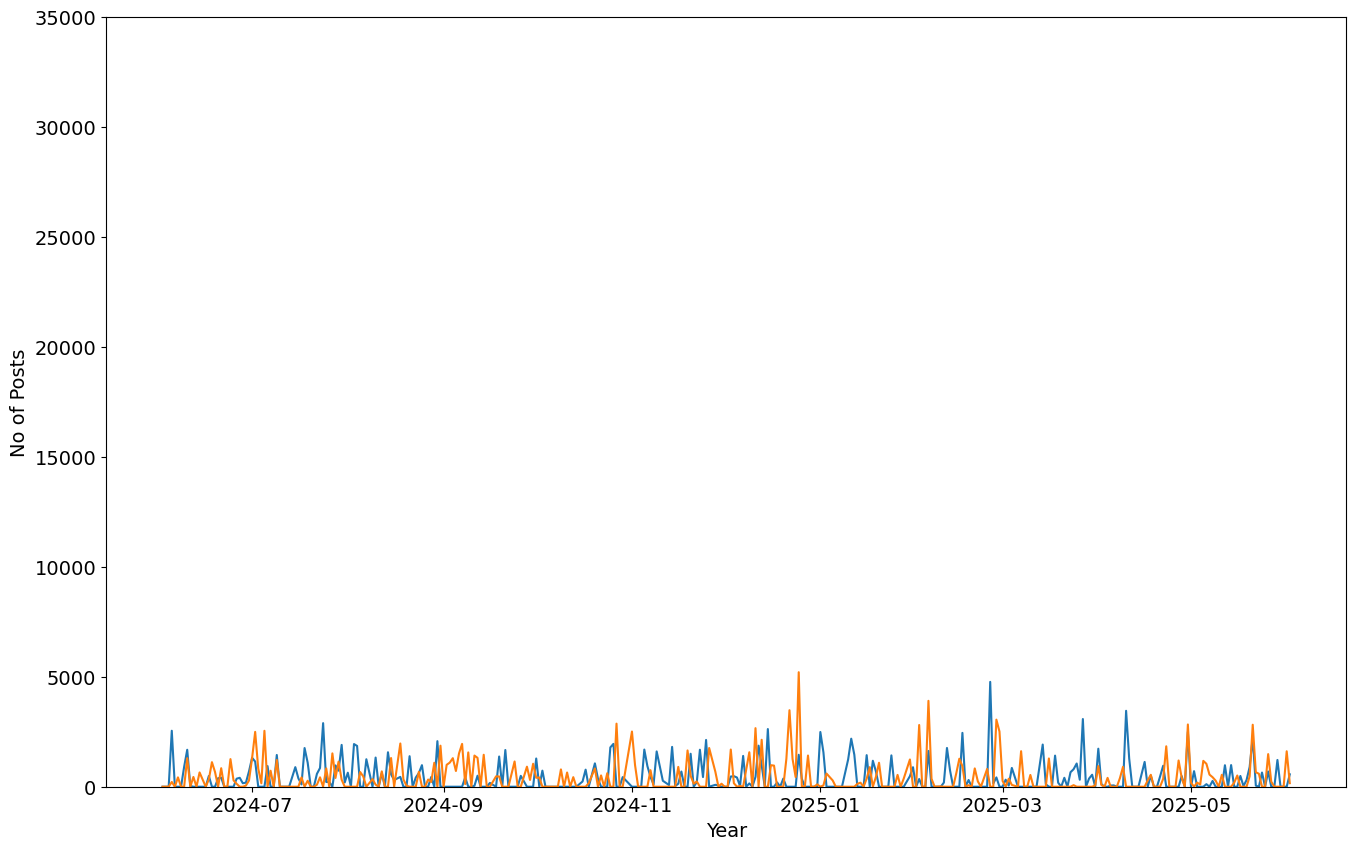

In [36]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Posts",fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df["Kitchen"])
plt.plot(reshaped_df.index,reshaped_df["Electronics"])

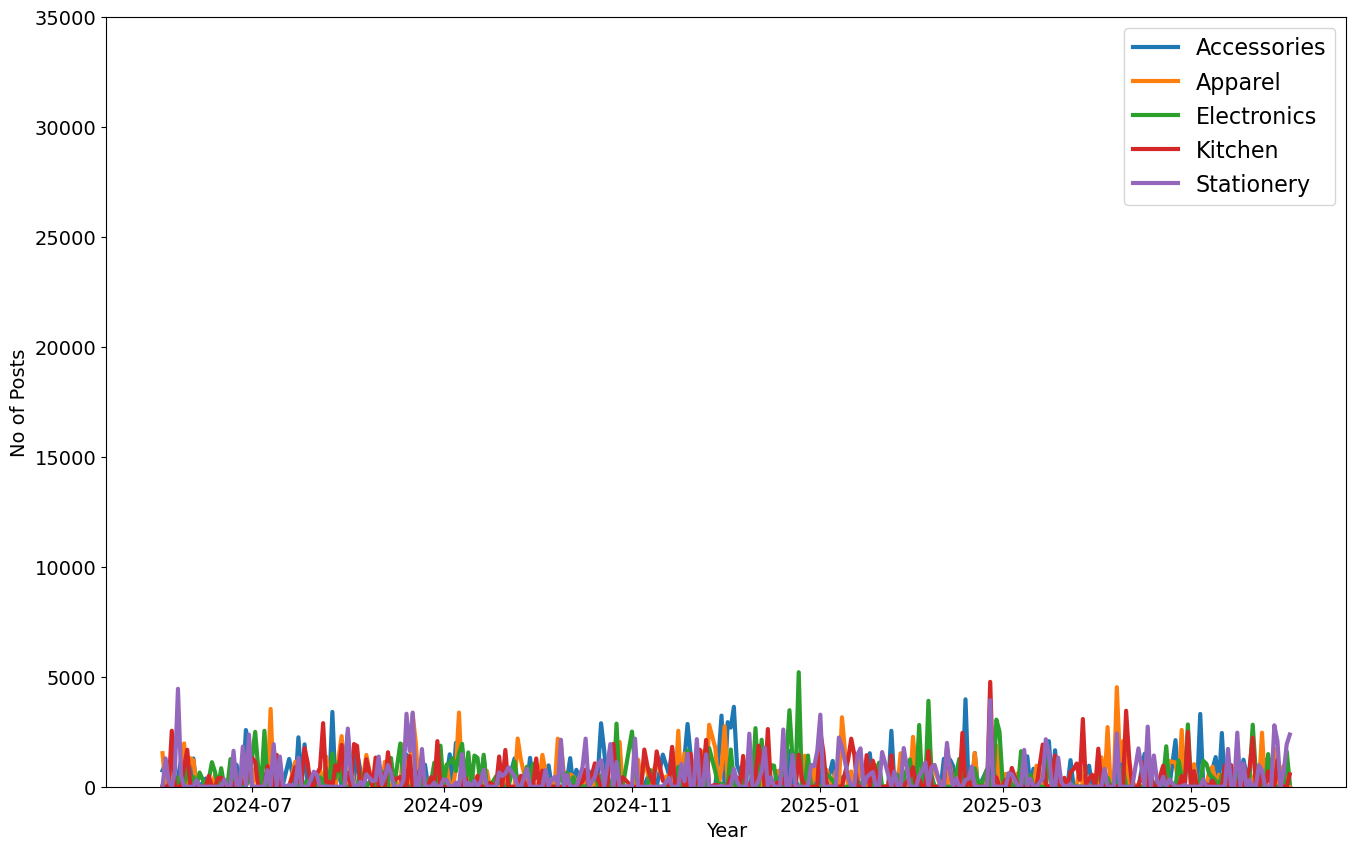

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Posts",fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],label=column,linewidth=3)
plt.legend(fontsize=16)
plt.show(block=False)

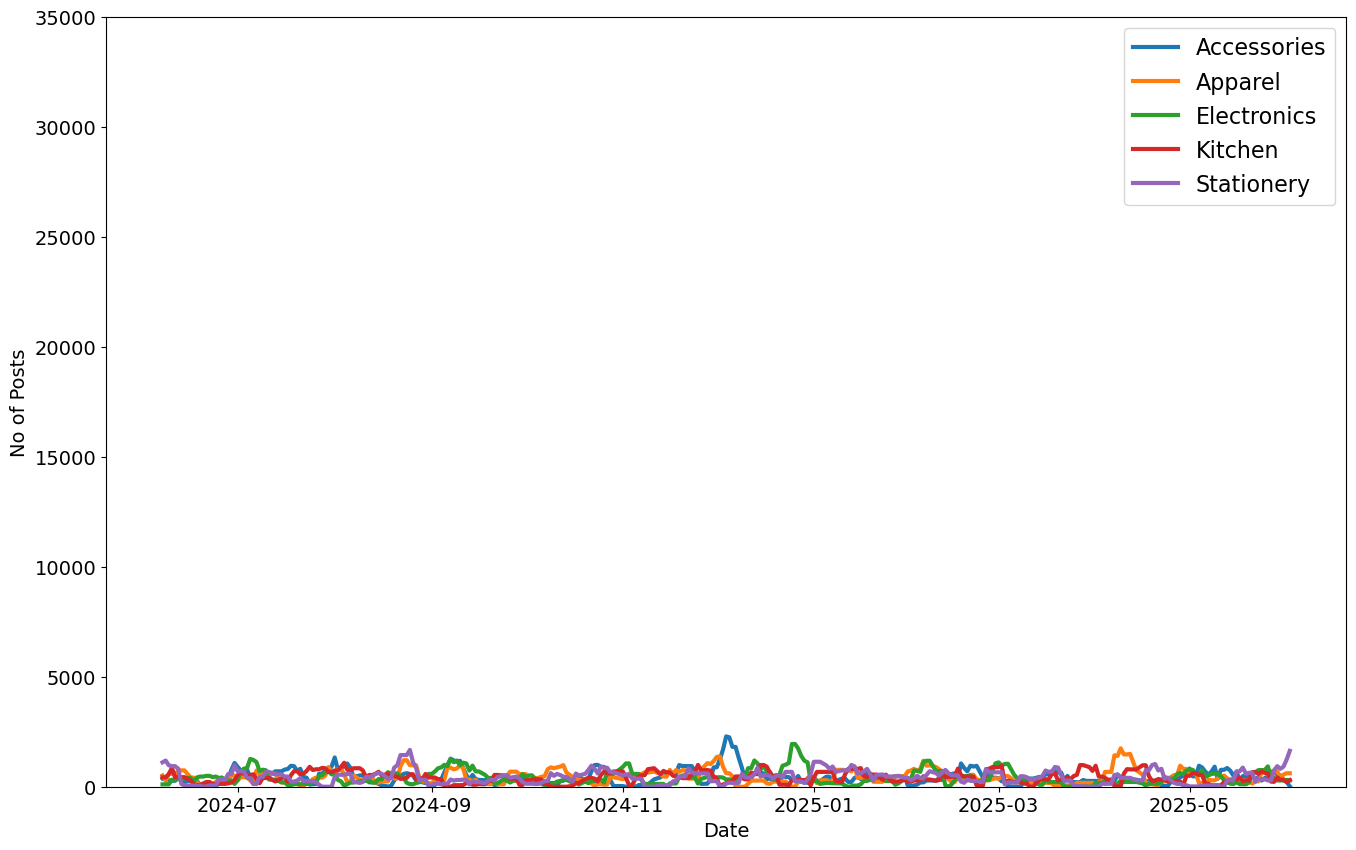

In [38]:
rolling_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("No of Posts", fontsize=14)
plt.ylim(0, 35000)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], label=column, linewidth=3)

plt.legend(fontsize=16)
plt.show()